In [1]:
import pandas as pd


#Open the dataset in xlsx form, convert it to csv and save it
#dataset = pd.read_excel (r'experimentdata.xlsx')
#dataset.to_csv (r'experimentdata', index = None, header=True)

# Load dataset

In [2]:
import pandas as pd

#Open the dataset in xlsx form, convert it to csv and save it
#dataset = pd.read_excel (r'experimentdata.xlsx')
#dataset.to_csv (r'experimentdata', index = None, header=True)

# Read the dataset in csv
data = pd.read_csv("experimentdata.csv") 
df = data

# Set pandas to show all columns
pd.set_option("display.max_columns", None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Num                               708 non-null    int64  
 1   ID                                708 non-null    int64  
 2   Ethinicity                        708 non-null    int64  
 3   BMI                               708 non-null    float64
 4   Caterogy_Obesity                  708 non-null    int64  
 5   Smoker                            708 non-null    int64  
 6   Alcoholics                        708 non-null    int64  
 7   Presenting_Symptoms               708 non-null    int64  
 8   Location                          708 non-null    int64  
 9   Menarchy_Age                      708 non-null    float64
 10  Caterogy_Menarche                 708 non-null    int64  
 11  Menopause_Age                     708 non-null    float64
 12  Caterogy

In [4]:
# Dropping some values that already pre-processed by the collaborator to return the dataset back to raw
df = df.drop(['Caterogy_Menarche', 'Caterogy_Menopause','Caterogy_LateMenopause','Caterogy_HRT','Caterogy_HRT_Duration','Caterogy_Age','Prev_Malignant','degree_of_relatives','Caterogy_COCP','Caterogy_COCP_Duration','Caterogy_Parity','Caterogy_ChildBirth','Caterogy_BreastFeeding_Duration','S_Age','S_Personal_Hx_Malignant','S_Degree_Family','S_COCP','S_BreastFeeding','S_BIRADS','S_TOTAL','Quartiles','BMI'], axis=1)

In [5]:
# Checking missing value
df.head()

,Num,ID,Ethinicity,Caterogy_Obesity,Smoker,Alcoholics,Presenting_Symptoms,Location,Menarchy_Age,Menopause_Age,HRT_Duration,Density,AGE,Previous_breast_diseae_malignant,FamHxofBreastCa,COCP_Duration,Parity_Num,Age_1stChildBirth,Breast_feeding_duration,BIRADS,Outcomes
0,1,99999989,2,3,999,999,1,999,13.585849,43.364857,14.0,2,60,2,0,33.0,3.0,20.0,21.334421,3,0
1,2,99999990,1,4,0,0,1,999,13.000000,48.000000,21.0,2,60,0,0,31.0,2.0,22.0,10.000000,2,0
2,3,99999992,2,999,0,0,999,999,12.000000,28.000000,0.0,4,60,0,0,0.0,0.0,0.0,0.000000,6,0
3,4,34114126,3,4,999,999,1,2,13.000000,30.000000,0.0,1,81,1,0,0.0,2.0,32.0,0.000000,2,0
4,5,35090753,2,4,0,0,3,2,13.083360,50.000000,0.0,2,80,0,1,0.0,4.0,21.0,48.000000,3,0


# Data Cleansing

## Correcting typo in variable names

In [6]:
df = df.rename({'Ethinicity': 'Ethnicity', 'AGE': 'Age', 'Previous_breast_diseae_malignant':'Previous_breast_malignancy', 'Caterogy_Obesity':'Category_Obesity'}, axis=1)

## Rounding some errors value 

In [7]:
# Rounding some import error from excel to pandas, and convert them to integer ( except BMI because its originally float value)

df.Menarchy_Age = df.Menarchy_Age.round(0).astype(int)
df.Menopause_Age = df.Menopause_Age.round(0).astype(int)
df.HRT_Duration = df.HRT_Duration.round(0).astype(int)
df.COCP_Duration = df.COCP_Duration.round(0).astype(int)
df.Parity_Num = df.Parity_Num.round(0).astype(int)
df.Age_1stChildBirth = df.Age_1stChildBirth.round(0).astype(int)
df.Breast_feeding_duration = df.Breast_feeding_duration.round(0).astype(int)

## Handling missing values 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Num                         708 non-null    int64
 1   ID                          708 non-null    int64
 2   Ethnicity                   708 non-null    int64
 3   Category_Obesity            708 non-null    int64
 4   Smoker                      708 non-null    int64
 5   Alcoholics                  708 non-null    int64
 6   Presenting_Symptoms         708 non-null    int64
 7   Location                    708 non-null    int64
 8   Menarchy_Age                708 non-null    int32
 9   Menopause_Age               708 non-null    int32
 10  HRT_Duration                708 non-null    int32
 11  Density                     708 non-null    int64
 12  Age                         708 non-null    int64
 13  Previous_breast_malignancy  708 non-null    int64
 14  FamHxofBre

In [9]:
# Replace 999 to nan so we can count how many missing value we have
import numpy as np
df = df.replace(999, np.nan)

In [10]:
df.isna().sum()

Num                             0
ID                              0
Ethnicity                       0
Category_Obesity              106
Smoker                         66
Alcoholics                     68
Presenting_Symptoms            26
Location                       99
Menarchy_Age                    0
Menopause_Age                   0
HRT_Duration                    0
Density                         0
Age                             0
Previous_breast_malignancy      0
FamHxofBreastCa                 0
COCP_Duration                   0
Parity_Num                      0
Age_1stChildBirth               0
Breast_feeding_duration         0
BIRADS                          0
Outcomes                        0
dtype: int64

<AxesSubplot:>

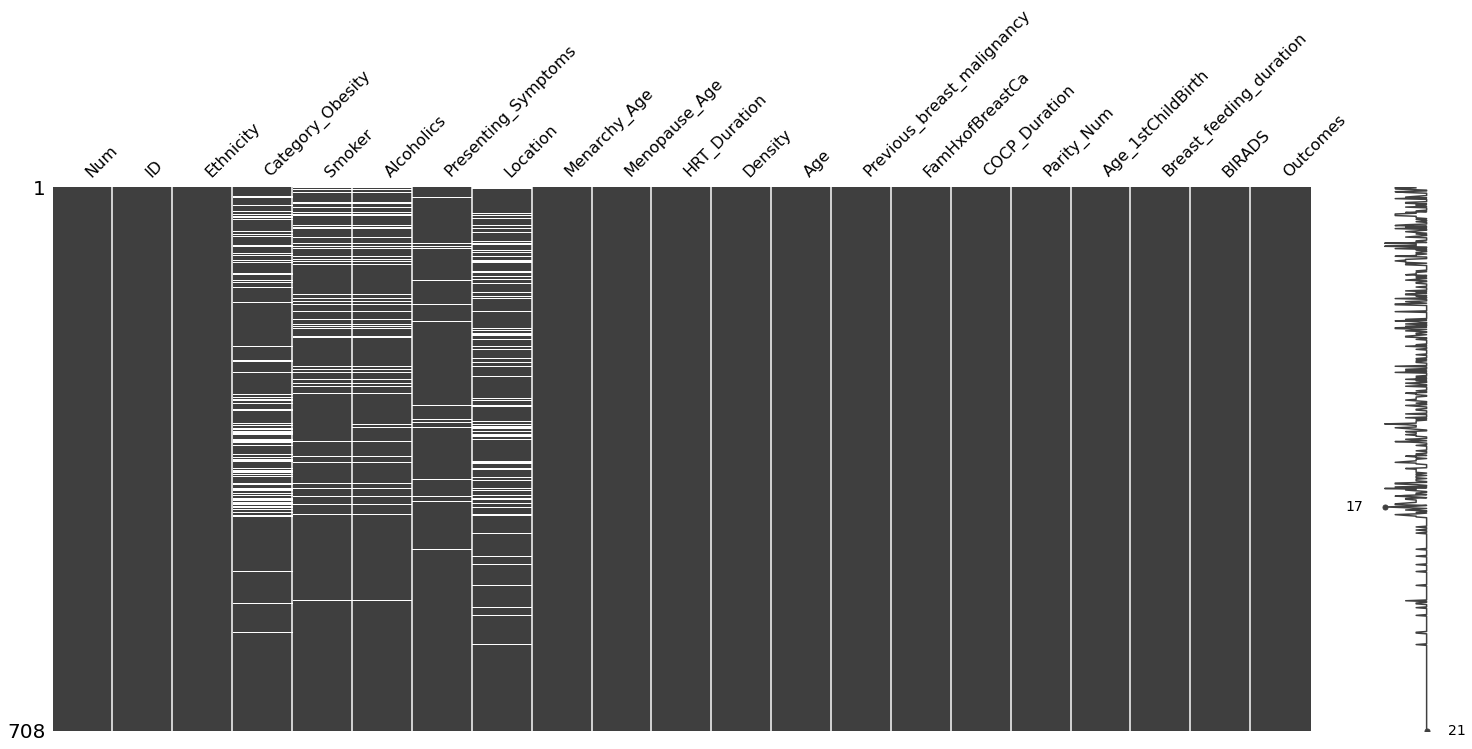

In [11]:
#Checking type of Missing value
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

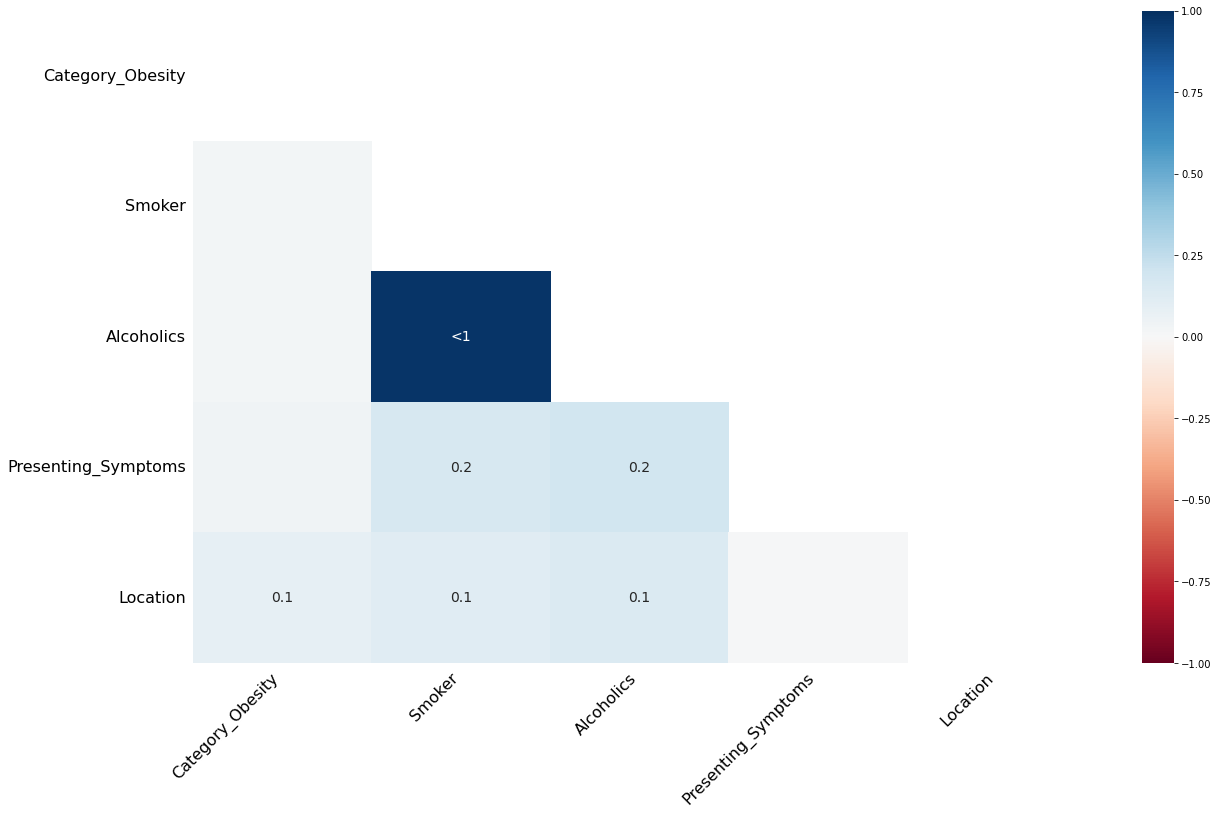

In [12]:
#Checking if there is MNAR between SMoker and Alcoholics Variables
msno.heatmap(df)

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

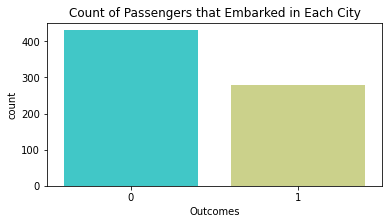

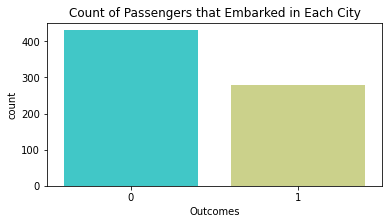

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,3))
sns.countplot(x='Outcomes',data=df, palette='rainbow')
plt.title("Count of Passengers that Embarked in Each City")

plt.figure(figsize=(6,3))
sns.countplot(x='Outcomes',data=df, palette='rainbow')
plt.title("Count of Passengers that Embarked in Each City")

### Deleting MNAR variables

MNAR ( missing not at random )

Missing not at random data is tough in healthcare. To determine if data are MNAR for definite, we need to know their value in a subset of observations (patients).

There is no easy way to handle this. If at all possible, try to get the missing data. Otherwise, take care when drawing conclusions from analyses where data are thought to be missing not at random.

Even the study showed simple imputation like logistic regression did not work that well for MNAR, so for now just drop this column, other consideration is also because it does not have big correlation in the heat map to the outcomes, also with other variables.

source : https://cran.r-project.org/web/packages/finalfit/vignettes/missing.html

<AxesSubplot:>

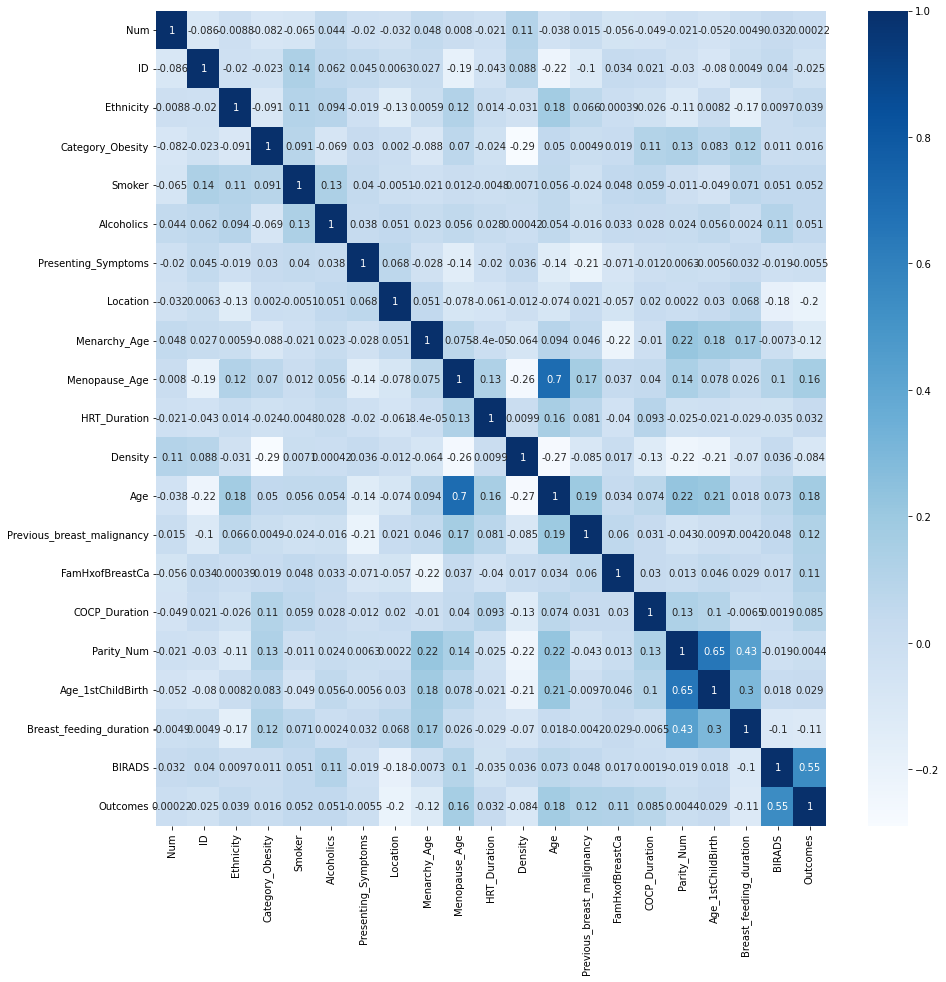

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [15]:
df.drop(['Smoker', 'Alcoholics'], axis = 1, inplace=True)

### Imputing missing value

In [16]:
# Filling the null values with mean and mode
# mean for BMI, because BMI is float, and the other with mode bcs categorical

df['Category_Obesity'] = df['Category_Obesity'].fillna(df['Category_Obesity'].mode()[0])
df['Presenting_Symptoms'] = df['Presenting_Symptoms'].fillna(df['Presenting_Symptoms'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])

In [17]:
df.head()

,Num,ID,Ethnicity,Category_Obesity,Presenting_Symptoms,Location,Menarchy_Age,Menopause_Age,HRT_Duration,Density,Age,Previous_breast_malignancy,FamHxofBreastCa,COCP_Duration,Parity_Num,Age_1stChildBirth,Breast_feeding_duration,BIRADS,Outcomes
0,1,99999989,2,3.0,1.0,1.0,14,43,14,2,60,2,0,33,3,20,21,3,0
1,2,99999990,1,4.0,1.0,1.0,13,48,21,2,60,0,0,31,2,22,10,2,0
2,3,99999992,2,4.0,1.0,1.0,12,28,0,4,60,0,0,0,0,0,0,6,0
3,4,34114126,3,4.0,1.0,2.0,13,30,0,1,81,1,0,0,2,32,0,2,0
4,5,35090753,2,4.0,3.0,2.0,13,50,0,2,80,0,1,0,4,21,48,3,0


## Handling categorical data

Categorical data types : 

Smoker, Alcoholics is excluded because those are deleted

- Nominal : Ethnicity, Presenting_Symptomps, Location, FamHxofBreastCa, Outcomes 
- Ordinal : Density, BIRADS, Caterogy_Obesity, Previous_breast_diseae_malignant

Numerical data types :
- Continous : Menarchy_Age, Menopause_Age, Age, Breast_feeding_duration, Age_1stChildBirth, COCP_Duration, HRT_Duration
- Discrete : Parity_Num

In [18]:
print(df['Ethnicity'].unique())
print(df['Presenting_Symptoms'].unique())
print(df['Location'].unique())
print(df['FamHxofBreastCa'].unique())

[2 1 3 4]
[1. 3. 2. 5. 4.]
[1. 2. 3. 4. 6. 5.]
[0 1]


### Handling Outliers

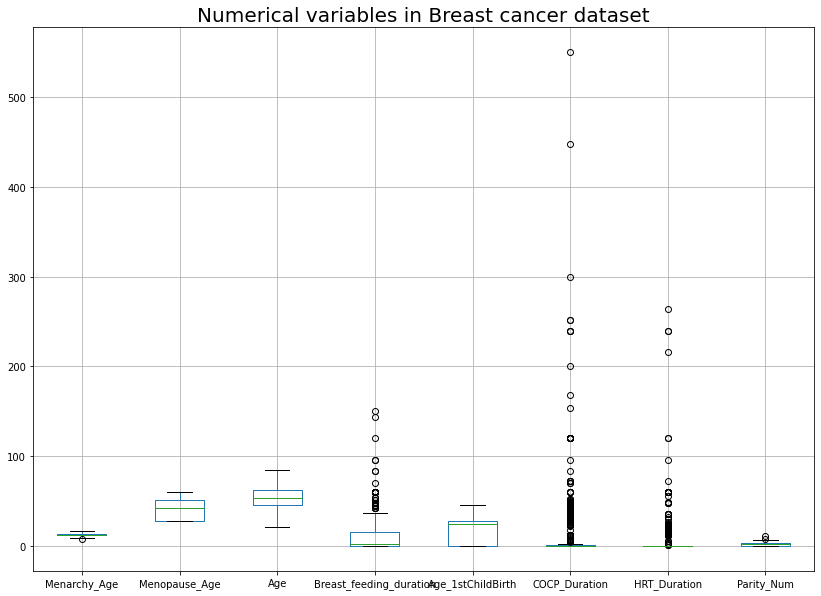

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
col_toshow = ['Menarchy_Age','Menopause_Age','Age','Breast_feeding_duration','Age_1stChildBirth','COCP_Duration','HRT_Duration','Parity_Num']
df[col_toshow].boxplot()
plt.title("Numerical variables in Breast cancer dataset", fontsize=20)
plt.show()

## Feature Scaling

Performing feature scaling to numerical variables using RobustScaler, it is one approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

In [20]:
df_numerical_scaled = df[['Menarchy_Age','Menopause_Age','Age','Breast_feeding_duration','Age_1stChildBirth','COCP_Duration','HRT_Duration','Parity_Num']]
# df_numerical_scaled = df.copy()
col_names = list(df_numerical_scaled.columns)

In [21]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(df_numerical_scaled)
df_r = pd.DataFrame(df_r, columns=col_names)

In [22]:
df_r

,Menarchy_Age,Menopause_Age,Age,Breast_feeding_duration,Age_1stChildBirth,COCP_Duration,HRT_Duration,Parity_Num
0,0.5,0.021739,0.352941,1.1875,-0.160714,33.0,14.0,0.333333
1,0.0,0.239130,0.352941,0.5000,-0.089286,31.0,21.0,0.000000
2,-0.5,-0.630435,0.352941,-0.1250,-0.875000,0.0,0.0,-0.666667
3,0.0,-0.543478,1.588235,-0.1250,0.267857,0.0,0.0,0.000000
4,0.0,0.326087,1.529412,2.8750,-0.125000,0.0,0.0,0.666667
...,...,...,...,...,...,...,...,...
703,0.0,-0.630435,-1.058824,1.3750,0.303571,0.0,0.0,-0.333333
704,0.5,-0.630435,-1.823529,-0.1250,-0.875000,0.0,0.0,-0.666667
705,0.0,0.108696,-0.529412,2.5000,0.125000,0.0,0.0,0.333333
706,-0.5,-0.630435,-0.176471,1.3750,0.017857,0.0,0.0,0.666667


In [23]:
#Combining dataset again after feature selection

df_categorical = df.drop(['Menarchy_Age','Menopause_Age','Age','Breast_feeding_duration','Age_1stChildBirth','COCP_Duration','HRT_Duration','Parity_Num'], axis = 1)
df_ready = pd.concat([df_categorical, df_numerical_scaled], axis=1, join='inner')

In [24]:
df_ready

,Num,ID,Ethnicity,Category_Obesity,Presenting_Symptoms,Location,Density,Previous_breast_malignancy,FamHxofBreastCa,BIRADS,Outcomes,Menarchy_Age,Menopause_Age,Age,Breast_feeding_duration,Age_1stChildBirth,COCP_Duration,HRT_Duration,Parity_Num
0,1,99999989,2,3.0,1.0,1.0,2,2,0,3,0,14,43,60,21,20,33,14,3
1,2,99999990,1,4.0,1.0,1.0,2,0,0,2,0,13,48,60,10,22,31,21,2
2,3,99999992,2,4.0,1.0,1.0,4,0,0,6,0,12,28,60,0,0,0,0,0
3,4,34114126,3,4.0,1.0,2.0,1,1,0,2,0,13,30,81,0,32,0,0,2
4,5,35090753,2,4.0,3.0,2.0,2,0,1,3,0,13,50,80,48,21,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,963,6108938,2,2.0,3.0,6.0,4,0,1,3,0,13,28,36,24,33,0,0,1
704,964,35900006,2,2.0,2.0,1.0,4,0,0,4,0,14,28,23,0,0,0,0,0
705,965,35878625,2,3.0,2.0,2.0,3,0,0,1,0,13,45,45,42,28,0,0,3
706,966,35947968,2,2.0,1.0,1.0,2,0,1,3,0,12,28,51,24,25,0,0,4


In [61]:
import warnings
warnings.filterwarnings(action='ignore')

# Preparing Model for RFE
X = df_ready.drop(['Outcomes','Num','ID'], axis=1)
y = df_ready['Outcomes']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

#Create a svm Classifier
SVM = svm.SVC(kernel='linear') #Linear Kernel
RFC = RandomForestClassifier()
DT = tree.DecisionTreeClassifier()
MLP = MLPClassifier(random_state=2, max_iter=1000, activation='logistic', solver='sgd')
KNN = KNeighborsClassifier(n_neighbors=5)


#Train the model using the training sets
SVMClassifier = SVM.fit(X_train, y_train)
RFClassifier = RFC.fit(X_train, y_train)
DTClassifier = DT.fit(X_train, y_train)
MLPerClassifier = MLP.fit(X_train, y_train)
KNNClassifier = KNN.fit(X_train,y_train)


# Nanti ini dihapus
from sklearn.metrics import accuracy_score, classification_report

predSVM_noFS = SVMClassifier.predict(X_test)
predRF_noFS = RFClassifier.predict(X_test)
predDT_noFS = DTClassifier.predict(X_test)
predMLP_noFS = MLPerClassifier.predict(X_test)
predKNN_noFS = KNNClassifier.predict(X_test)

# Model Evaluation
accSVM = accuracy_score(y_test, predSVM_noFS)
reportSVM = classification_report(y_test, predSVM_noFS)

accRF = accuracy_score(y_test, predRF_noFS)
reportRF = classification_report(y_test, predRF_noFS)

accDT = accuracy_score(y_test, predDT_noFS)
reportDT = classification_report(y_test, predDT_noFS)

accMLP = accuracy_score(y_test, predMLP_noFS)
reportMLP = classification_report(y_test, predMLP_noFS)

accKNN = accuracy_score(y_test, predKNN_noFS)
reportKNN = classification_report(y_test, predKNN_noFS)

print("---------------10 Cross validation--------------------")

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, random_state=None)

kf_SVM = cross_val_score(SVM , X, y, cv = kf)
kf_RFC = cross_val_score(RFC , X, y, cv = kf)
kf_DT = cross_val_score(DT , X, y, cv = kf)
kf_MLP = cross_val_score(MLP , X, y, cv = kf)
kf_KNN = cross_val_score(KNN , X, y, cv = kf)
 
print("Avg accuracy SVM: {}".format(kf_SVM.mean()))
print("Avg accuracy RFC: {}".format(kf_RFC.mean()))
print("Avg accuracy DT: {}".format(kf_DT.mean()))
print("Avg accuracy MLP: {}".format(kf_MLP.mean()))
print("Avg accuracy KNN: {}".format(kf_KNN.mean()))

---------------10 Cross validation--------------------
Avg accuracy SVM: 0.8036759564479073
Avg accuracy RFC: 0.7966636699630406
Avg accuracy DT: 0.7203975626810508
Avg accuracy MLP: 0.7162421336529817
Avg accuracy KNN: 0.6273199480571372


In [57]:
print("Support Vector Machine ---------------------")
#print('Acc SVM: {:.4f}'.format(accSVM))
print(reportSVM)

print("Random Forest ---------------------")
#print('Acc RF: {:.4f}'.format(accRF))
print(reportRF)

print("Decision Tree ---------------------")
#print('Acc RF: {:.4f}'.format(accDT))
print(reportDT)

print("MLP ---------------------")
#print('Acc RF: {:.4f}'.format(accMLP))
print(reportMLP)

print("KNN ---------------------")
#print('Acc RF: {:.4f}'.format(accKNN))
print(reportKNN)

Support Vector Machine ---------------------
              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.81      0.64      0.71        33

    accuracy                           0.76        71
   macro avg       0.77      0.75      0.75        71
weighted avg       0.77      0.76      0.76        71

Random Forest ---------------------
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        38
           1       0.85      0.70      0.77        33

    accuracy                           0.80        71
   macro avg       0.81      0.80      0.80        71
weighted avg       0.81      0.80      0.80        71

Decision Tree ---------------------
              precision    recall  f1-score   support

           0       0.61      0.71      0.66        38
           1       0.59      0.48      0.53        33

    accuracy                           0.61        71
   macro av

----------------------------ROC Curve----------------------------


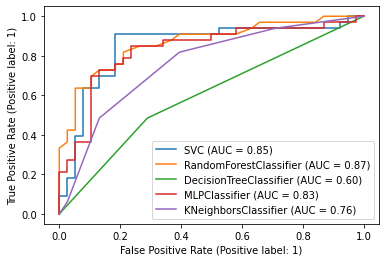

In [58]:
from sklearn.metrics import plot_roc_curve
print("----------------------------ROC Curve----------------------------")
disp = plot_roc_curve(SVMClassifier, X_test, y_test)
plot_roc_curve(RFClassifier, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTClassifier, X_test, y_test, ax=disp.ax_)
plot_roc_curve(MLPerClassifier, X_test, y_test, ax=disp.ax_)
plot_roc_curve(KNNClassifier, X_test, y_test, ax=disp.ax_)

# Feature Selection

## Feature Selection - Recursive Features Elemination

RFE Algorithm Steps :
1. RFE takes a supervised learning estimator that was already fit using data with all features.

2. Then it considers the coefficient associated with each feature which it gets from coef_ or feature_importances_ attribute. Basically, those coefficients are the same which we get after fitting the model on dataset after minimizing the residuals. The value of these coefficients represents their importance with the target variable. Feature with the least absolute coefficient value is considered as the least important and so on.

3. It then eliminates the least important coefficient from the list of features and rebuilds the model with the remaining set of features. The number of features to be dropped at each iteration is taken from step parameter. It is preferred to eliminate 1 feature at a time because once we rebuild the model, coefficient values of other features changes.

4. At each iteration, it rebuilds the model and eliminates the least important feature(s) and repeats the process until it reaches with 2 features. After that, it ranks feature-based on their time of elimination. Feature eliminated 1st is given the highest rank and so on. The last n eliminated features are marked as rank 1.


The disadvantage of RFE is that it does not consider Correlation between the independat features, so we need to check correlation of it in order to better result

source : https://www.linkedin.com/pulse/what-recursive-feature-elimination-amit-mittal/

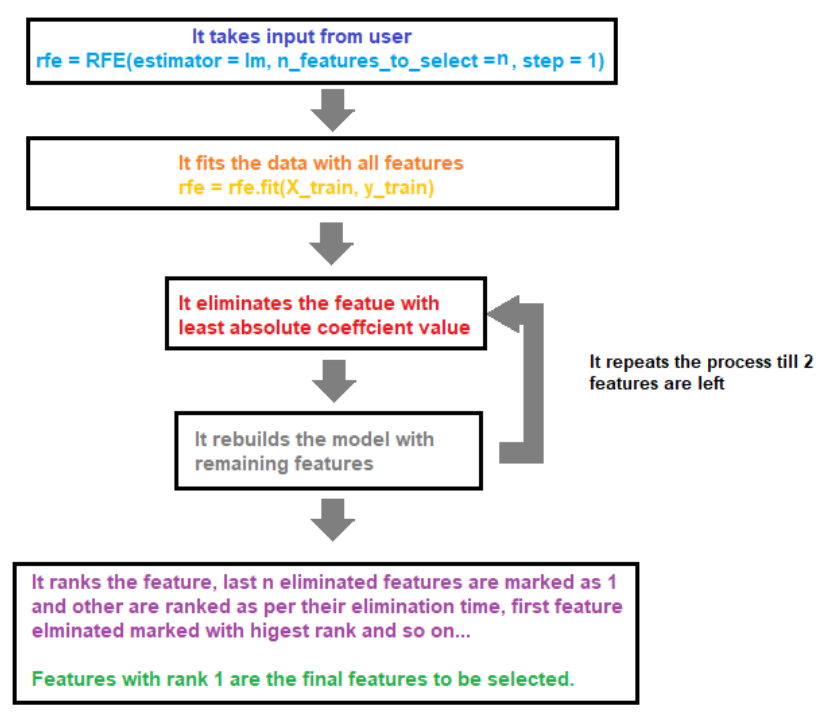

In [28]:
# from sklearn.preprocessing import MinMaxScaler

# col = df_ready.drop(['Outcomes','ID','Num'], axis=1)
# # Store the column/feature names into a list "colnames"
# colnames = col.columns

# # Define dictionary to store our rankings
# ranks = {}
# # Create our function which stores the feature rankings to the ranks dictionary
# def ranking(ranks, names, order=1):
#     minmax = MinMaxScaler()
#     ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
#     ranks = map(lambda x: round(x,2), ranks)
#     return dict(zip(names, ranks))


# from sklearn.feature_selection import RFE
# rfeSVM = RFE(estimator=SVMClassifier, n_features_to_select=1, verbose=3)


# # # fit RFE
# rfeSVM.fit(X, y)
# ranks["RFE"] = ranking(list(map(float, rfeSVM.ranking_)), colnames, order=-1)
    

In [29]:
# r = {}
# for name in colnames:
#     r[name] = round(np.mean([ranks[method][name] 
#                              for method in ranks.keys()]), 2)
 
# methods = sorted(ranks.keys())
# ranks["Mean"] = r
# methods.append("Mean")
 
# print("\t%s" % "\t".join(methods))
# for name in colnames:
#     print("%s\t%s" % (name, "\t".join(map(str, 
#                          [ranks[method][name] for method in methods]))))

In [30]:
# # Put the mean scores into a Pandas dataframe
# meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# # Sort the dataframe
# meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

In [31]:
# Let's plot the ranking of the features
# sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
#                size=14, aspect=1.9, palette='coolwarm')

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from pandas import DataFrame

logreg = LogisticRegression()
selector = RFE(logreg)
selector = selector.fit(X,y)

In [33]:
selected_features = DataFrame({'Feature':list(X.columns),'Ranking':selector.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
1,Category_Obesity,1
2,Presenting_Symptoms,1
3,Location,1
4,Density,1
5,Previous_breast_malignancy,1
6,FamHxofBreastCa,1
7,BIRADS,1
8,Menarchy_Age,1
0,Ethnicity,2
10,Age,3


## Feature Selection - Mutual Information

The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

(Technical note: What we're calling uncertainty is measured using a quantity from information theory known as "entropy". The entropy of a variable means roughly: "how many yes-or-no questions you would need to describe an occurance of that variable, on average." The more questions you have to ask, the more uncertain you must be about the variable. Mutual information is how many questions you expect the feature to answer about the target.)

Source : https://www.kaggle.com/ryanholbrook/mutual-information

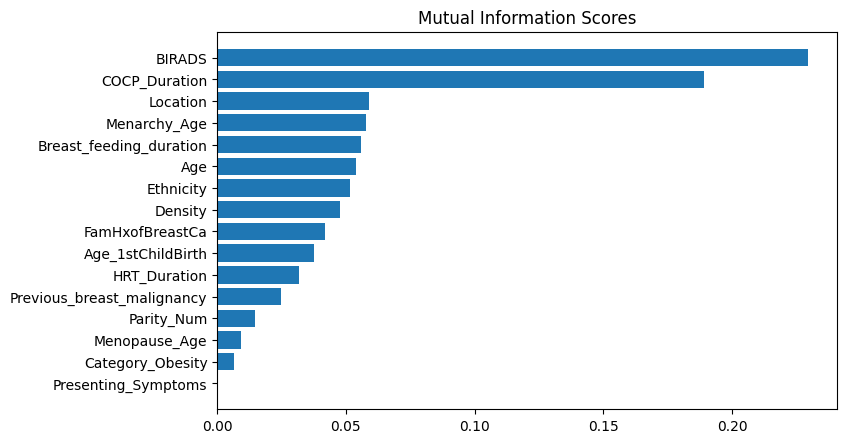

In [34]:
# MUTUAL INFORMATION

from sklearn.feature_selection import mutual_info_regression
discrete_features = X.dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores # show a few features with their MI scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

## Model Training

In [46]:
X_MI = df_ready.drop(['Outcomes','Num','ID','Ethnicity','Age','Location','HRT_Duration'], axis=1)
y_MI = df_ready['Outcomes']

X_RFE = df_ready.drop(['Outcomes','Num','ID','Presenting_Symptoms','Category_Obesity','Menopause_Age','Parity_Num'], axis=1)
y_RFE = df_ready['Outcomes']


# splitting for feature selected for RFE
X_trainRFE, X_testRFE, y_trainRFE, y_testRFE= train_test_split(X_RFE, y_RFE, test_size = 0.20)

# splitting for feature selected for Mutual information
X_trainMI, X_testMI, y_trainMI, y_testMI = train_test_split(X_MI, y_MI, test_size = 0.20)

In [50]:
# SVM = svm.SVC(kernel='linear') #Linear Kernel
# RFC = RandomForestClassifier()
# DT = tree.DecisionTreeClassifier()
# MLP = MLPClassifier(random_state=2, max_iter=1000, activation='logistic', solver='sgd')
# KNN = KNeighborsClassifier(n_neighbors=5)

#RFE variables Trained with the algorithms
SVMRFE = SVM.fit(X_trainRFE, y_trainRFE)
DTRFE = DT.fit(X_trainRFE, y_trainRFE)
KNNRFE = KNN.fit(X_trainRFE, y_trainRFE)
MLPRFE = MLP.fit(X_trainRFE, y_trainRFE)
RFCRFE = RFC.fit(X_trainRFE, y_trainRFE)

#MI variables Trained with the algorithms
SVMMI = SVM.fit(X_trainMI, y_trainMI)
DTMI = DT.fit(X_trainMI, y_trainMI)
KNNMI = KNN.fit(X_trainMI, y_trainMI)
MLPMI = MLP.fit(X_trainMI, y_trainMI)
RFCMI = RFC.fit(X_trainMI, y_trainMI)

In [51]:
# Model Evaluation RFE
predSVM_RFE = SVMRFE.predict(X_testRFE)
predRF_RFE = RFCRFE.predict(X_testRFE)
predDT_RFE = DTRFE.predict(X_testRFE)
predMLP_RFE = MLPRFE.predict(X_testRFE)
predKNN_RFE = KNNRFE.predict(X_testRFE)

reportSVMRFE = classification_report(y_testRFE, predSVM_RFE)
reportRFRFE = classification_report(y_testRFE, predRF_RFE)
reportDTRFE = classification_report(y_testRFE, predDT_RFE)
reportMLPRFE = classification_report(y_testRFE, predMLP_RFE)
reportKNNRFE = classification_report(y_testRFE, predKNN_RFE)


print("Support Vector Machine with RFE ---------------------")
#print('Acc SVM: {:.4f}'.format(accSVM))
print(reportSVMRFE)

print("Random Forest with RFE ---------------------")
#print('Acc RF: {:.4f}'.format(accRF))
print(reportRFRFE)

print("Decision Tree with RFE ---------------------")
#print('Acc RF: {:.4f}'.format(accDT))
print(reportDTRFE)

print("MLP with RFE ---------------------")
#print('Acc RF: {:.4f}'.format(accMLP))
print(reportMLPRFE)

print("KNN with RFE ---------------------")
#print('Acc RF: {:.4f}'.format(accKNN))
print(reportKNNRFE)

Support Vector Machine with RFE ---------------------
              precision    recall  f1-score   support

           0       0.75      0.81      0.77        77
           1       0.75      0.68      0.71        65

    accuracy                           0.75       142
   macro avg       0.75      0.74      0.74       142
weighted avg       0.75      0.75      0.75       142

Random Forest with RFE ---------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.84      0.78      0.81        65

    accuracy                           0.83       142
   macro avg       0.83      0.83      0.83       142
weighted avg       0.83      0.83      0.83       142

Decision Tree with RFE ---------------------
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        77
           1       0.67      0.74      0.70        65

    accuracy                          

In [60]:
# K Validation for RFE 

kf_SVMRFE = cross_val_score(SVM , X_RFE, y_RFE, cv = kf)
kf_RFCRFE = cross_val_score(RFC , X_RFE, y_RFE, cv = kf)
kf_DTRFE = cross_val_score(DT , X_RFE, y_RFE, cv = kf)
kf_MLPRFE = cross_val_score(MLP , X_RFE, y_RFE, cv = kf)
kf_KNNRFE = cross_val_score(KNN , X_RFE, y_RFE, cv = kf)
 
print("Avg accuracy SVM with RFE: {}".format(kf_SVMRFE.mean()))
print("Avg accuracy RFC with RFE: {}".format(kf_RFCRFE.mean()))
print("Avg accuracy DT with RFE: {}".format(kf_DTRFE.mean()))
print("Avg accuracy MLP with RFE: {}".format(kf_MLPRFE.mean()))
print("Avg accuracy KNN with RFE: {}".format(kf_KNNRFE.mean()))

Avg accuracy SVM with RFE: 0.8037059234841675
Avg accuracy RFC with RFE: 0.8108280891019879
Avg accuracy DT with RFE: 0.7076216162221556
Avg accuracy MLP with RFE: 0.7148436719608432
Avg accuracy KNN with RFE: 0.6244031565278194


In [52]:
# Model Evaluation MI
predSVM_MI = SVMMI.predict(X_testMI)
predRF_MI = RFCMI.predict(X_testMI)
predDT_MI = DTMI.predict(X_testMI)
predMLP_MI = MLPMI.predict(X_testMI)
predKNN_MI = KNNMI.predict(X_testMI)

reportSVMMI = classification_report(y_testMI, predSVM_MI)
reportRFMI = classification_report(y_testMI, predRF_MI)
reportDTMI = classification_report(y_testMI, predDT_MI)
reportMLPMI = classification_report(y_testMI, predMLP_MI)
reportKNNMI = classification_report(y_testMI, predKNN_MI)

print("Support Vector Machine with MI ---------------------")
#print('Acc SVM: {:.4f}'.format(accSVM))
print(reportSVMMI)

print("Random Forest with MI ---------------------")
#print('Acc RF: {:.4f}'.format(accRF))
print(reportRFMI)

print("Decision Tree with MI ---------------------")
#print('Acc RF: {:.4f}'.format(accDT))
print(reportDTMI)

print("MLP with MI ---------------------")
#print('Acc RF: {:.4f}'.format(accMLP))
print(reportMLPMI)

print("KNN with MI ---------------------")
#print('Acc RF: {:.4f}'.format(accKNN))
print(reportKNNMI)

Support Vector Machine with MI ---------------------
              precision    recall  f1-score   support

           0       0.82      0.92      0.86        83
           1       0.86      0.71      0.78        59

    accuracy                           0.83       142
   macro avg       0.84      0.81      0.82       142
weighted avg       0.83      0.83      0.83       142

Random Forest with MI ---------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        83
           1       0.80      0.69      0.75        59

    accuracy                           0.80       142
   macro avg       0.80      0.79      0.79       142
weighted avg       0.80      0.80      0.80       142

Decision Tree with MI ---------------------
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        83
           1       0.68      0.61      0.64        59

    accuracy                           0.

In [59]:
# K Validation for Mutual Information

kf_SVMMI = cross_val_score(SVM , X_MI, y_MI, cv = kf)
kf_RFCMI = cross_val_score(RFC , X_MI, y_MI, cv = kf)
kf_DTMI = cross_val_score(DT , X_MI, y_MI, cv = kf)
kf_MLPMI = cross_val_score(MLP , X_MI, y_MI, cv = kf)
kf_KNNMI = cross_val_score(KNN , X_MI, y_MI, cv = kf)
 
print("Avg accuracy SVM with MI: {}".format(kf_SVMMI.mean()))
print("Avg accuracy RFC with MI: {}".format(kf_RFCMI.mean()))
print("Avg accuracy DT with MI: {}".format(kf_DTMI.mean()))
print("Avg accuracy MLP with MI: {}".format(kf_MLPMI.mean()))
print("Avg accuracy KNN with MI: {}".format(kf_KNNMI.mean()))

Avg accuracy SVM with MI: 0.8008490660273699
Avg accuracy RFC with MI: 0.8149835181300569
Avg accuracy DT with MI: 0.7161821995804615
Avg accuracy MLP with MI: 0.7289281790030966
Avg accuracy KNN with MI: 0.6625212266506841


In [62]:
pd.to_pickle(RFCRFE,r'C:\Users\Hp\Desktop\Final Year Project\My Files\Project file\model.pickle')

In [65]:
print(X_RFE)

     Ethnicity  Location  Density  Previous_breast_malignancy  \
0            2       1.0        2                           2   
1            1       1.0        2                           0   
2            2       1.0        4                           0   
3            3       2.0        1                           1   
4            2       2.0        2                           0   
..         ...       ...      ...                         ...   
703          2       6.0        4                           0   
704          2       1.0        4                           0   
705          2       2.0        3                           0   
706          2       1.0        2                           0   
707          3       2.0        2                           0   

     FamHxofBreastCa  BIRADS  Menarchy_Age  Age  Breast_feeding_duration  \
0                  0       3            14   60                       21   
1                  0       2            13   60                    

In [64]:
predictor = pd.read_pickle(r'C:\Users\Hp\Desktop\Final Year Project\My Files\Project file\model.pickle')

In [66]:
Ethnicity = input("Ethnicity:")
Location = input("Location:")
Density = input("Density:")
Previous_breast_malignancy = input("Previous_breast_malignancy:")
FamHxofBreastCa = input("FamHxofBreastCa:")
BIRADS = input("BIRADS:")
Menarchy_Age = input("Menarchy_Age:")
Age = input("Age:")
Breast_feeding_duration = input("Breast_feeding_duration:")
Age_1stChildBirth = input("Age_1stChildBirth:")
COCP_Duration = input("COCP_Duration:")
HRT_Duration = input("HRT_Duration:")

Ethnicity:2
Location:1
Density:2
Previous_breast_malignancy:2
FamHxofBreastCa:0
BIRADS:3
Menarchy_Age:14
Age:60
Breast_feeding_duration:21
Age_1stChildBirth:20
COCP_Duration:33
HRT_Duration:14


In [67]:
result = predictor.predict([[Ethnicity,Location,Density,Previous_breast_malignancy,FamHxofBreastCa,BIRADS,Menarchy_Age,Age,Breast_feeding_duration,Age_1stChildBirth,COCP_Duration,HRT_Duration]])

In [68]:
print(result)

[0]
